<a href="https://colab.research.google.com/github/imambritish/aplikasi-Fuzzy-Inference-System/blob/main/bismillahFIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PENERAPAN FUZZY INFERENCE SYSTEM METODE MAMDANI UNTUK PENENTUAN BESARAN PERSENTASE BEASISWA

**contoh kasus**

penerapan algoritma Fuzzy Inference System dengan metode MAMDANI untuk penentuan besaran persentase beasiswa mahasiswa baru, sehingga beasiswa 
diterima oleh calon mahasiswa tersebut tepat dan objektif.

**variabel**

variabel input : Nilai Test Tertulis, Hasil dari Wawancara, Nilai Raport, Penghasilan Orang Tua, Rekening Listrik sebulan terakhir

variabel output : Besarnya Beasiswa

**himpunan fuzzy**

himpunan nilai test tulis : RENDAH, TINGGI

himpunan rekening penggunaan listrik : IRIT, BOROS  

himpunan besaran penghasilan orangtua : KECIL, BESAR

himpunan besar beasiswa : RENDAH, SEDANG, TINGGI


**semesta pembicaraan**

semesta nilai test = [0, 100]

semesta penggunaan listrik(kWh) = [0 , +∞]

semesta penghasilan(rupiah) = [0 , +∞ ]

semesta besar beasiswa(persen) : [0 100]

**domain**

domain nilai test tulis : RENDAH = [40, 79] , TINGGI = [70, 90]

domain penggunaan listrik : IRIT [62 128], BOROS [108 180]

domain penghasilan : KECIL [4000000, 7000000], BESAR = [5500000, 10000000]

domain besar beasiswa(persen) : RENDAH <= 45,  30 <= SEDANG <= 70, TINGGI >= 60 

besaran golongan beasiswa mana yang akan didapat jika murid memiliki test tulis dengan nilai sekian, penghasilan orang tua dengan jumlah sekian, dan penggunaan listrik sekian kWh. 

## FUZZIFIKASI

In [274]:
import matplotlib.pyplot as plt
import numpy as np
import math
from decimal import Decimal

KURVA UNTUK VARIABEL NILAI TEST TULIS

In [202]:
def inputNilai():
  global x_nilai

  print("Masukkan nilai test tulis dari siswa : ")
  x_nilai = float(input())

In [203]:
inputNilai()

Masukkan nilai test tulis dari siswa : 
55.0


In [275]:
def domainnilaiRendah():
  global x_nilai
  global a_nilaiRendah
  global c_nilaiRendah 
  global b_nilaiRendah
  global sbX_nilaiRendah
  global sbY_nilaiRendah

  print("Nilai test tulis dari siswa yang sudah di inputkan : {nilaiTes}".format(nilaiTes = x_nilai))

  print("Domain variabel fuzzy nilai test tulis di himpunan nilai test RENDAH (batas bawah) : ")
  a_nilaiRendah = float(input())
  print("Domain variabel fuzzy nilai test tulis di himpunan nilai test RENDAH (batas atas) : ")
  c_nilaiRendah = float(input())
  b_nilaiRendah = (a_nilaiRendah + c_nilaiRendah) / 2

  sbX_nilaiRendah = []
  sbY_nilaiRendah = []

  for i in np.arange(a_nilaiRendah,c_nilaiRendah + 1, 0.1):

    sbX_nilaiRendah.append(i)
    if  i < (b_nilaiRendah) and i > a_nilaiRendah:
      oordinat = 1 - 2* pow(((i - a_nilaiRendah) / (c_nilaiRendah - a_nilaiRendah)),2)
      sbY_nilaiRendah.append(oordinat)

    elif i > (b_nilaiRendah) and i < c_nilaiRendah: 
      oordinat = 2* pow(((c_nilaiRendah-i)/(c_nilaiRendah-a_nilaiRendah) ),2)
      sbY_nilaiRendah.append(oordinat)

    elif i == (b_nilaiRendah):
      oordinat = 0.5
      sbY_nilaiRendah.append(oordinat)

    elif i >= c_nilaiRendah:
      oordinat = 0
      sbY_nilaiRendah.append(oordinat)

    elif i <= a_nilaiRendah:
      oordinat = 1
      sbY_nilaiRendah.append(oordinat)
      
    i += 1

  sbX_nilaiRendah.insert(0, 0)  
  sbX_nilaiRendah.append(100)

  sbY_nilaiRendah.insert(0, 1)
  sbY_nilaiRendah.append(0)

  plt.plot(sbX_nilaiRendah,sbY_nilaiRendah, color = 'blue') 
  plt.axis([0, 100, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('kurva Variabel nilai tes RENDAH')
  plt.show


Nilai test tulis dari siswa yang sudah di inputkan : 55.0
Domain variabel fuzzy nilai test tulis di himpunan nilai test RENDAH (batas bawah) : 
40.0
Domain variabel fuzzy nilai test tulis di himpunan nilai test RENDAH (batas atas) : 
60.0


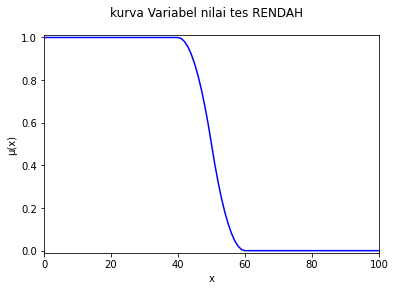

In [279]:
domainnilaiRendah()

In [206]:
def domainnilaiMenengah():
  global x_nilai
  global a_nilaiMenengah
  global c_nilaiMenengah
  global b_nilaiMenengah
  global d_nilaiMenengah
  global e_nilaiMenengah
  global sbX_nilaiMenengah
  global sbY_nilaiMenengah

  print("Nilai test tulis dari siswa yang sudah di inputkan : {nilaiTes}".format(nilaiTes = x_nilai))
  
  print("Domain variabel fuzzy nilai test tulis di himpunan nilai test MENENGAH (batas bawah) : ")
  a_nilaiMenengah = float(input())
  
  print("Domain variabel fuzzy nilai test tulis di himpunan nilai test MENENGAH (batas atas) :")
  b_nilaiMenengah = float(input()) 

  c_nilaiMenengah = (a_nilaiMenengah + b_nilaiMenengah) / 2
  d_nilaiMenengah = (a_nilaiMenengah + c_nilaiMenengah) / 2
  e_nilaiMenengah = (c_nilaiMenengah + b_nilaiMenengah) / 2

  sbX_nilaiMenengah = []
  sbY_nilaiMenengah = []

  for i in np.arange(a_nilaiMenengah, b_nilaiMenengah + 1, 0.1):

    sbX_nilaiMenengah.append(i)
    if  i <= (a_nilaiMenengah):
      oordinat = 0
      sbY_nilaiMenengah.append(oordinat)

    elif i < (d_nilaiMenengah) and i > a_nilaiMenengah:
      oordinat = oordinat = 2* pow(((i- a_nilaiMenengah)/(c_nilaiMenengah - a_nilaiMenengah) ),2)
      sbY_nilaiMenengah.append(oordinat)

    elif i == d_nilaiMenengah:
      oordinat = 0.5
      sbY_nilaiMenengah.append(oordinat)

    elif i < c_nilaiMenengah and i > d_nilaiMenengah:
      oordinat = 1 - 2* pow(((c_nilaiMenengah - i) / (c_nilaiMenengah - a_nilaiMenengah)),2)
      sbY_nilaiMenengah.append(oordinat)

    elif i == c_nilaiMenengah:
      oordinat = 1
      sbY_nilaiMenengah.append(oordinat)

    elif i > c_nilaiMenengah and i < e_nilaiMenengah:
      oordinat = 1 - 2* pow(((i - c_nilaiMenengah) / (b_nilaiMenengah - c_nilaiMenengah)),2)
      sbY_nilaiMenengah.append(oordinat)

    elif i == e_nilaiMenengah:
      oordinat = 0.5
      sbY_nilaiMenengah.append(oordinat)

    elif i > e_nilaiMenengah and i < b_nilaiMenengah:
      oordinat = 2* pow(((b_nilaiMenengah - i)/(b_nilaiMenengah - c_nilaiMenengah) ),2)
      sbY_nilaiMenengah.append(oordinat)

    elif i >= b_nilaiMenengah:
      oordinat =0
      sbY_nilaiMenengah.append(oordinat)

    i += 1
    
  sbX_nilaiMenengah.insert(0, 0)
  sbX_nilaiMenengah.append(100)

  sbY_nilaiMenengah.insert(0, 0)
  sbY_nilaiMenengah.append(0)
  
  plt.plot(sbX_nilaiMenengah,sbY_nilaiMenengah, color = 'green') 
  plt.axis([0, 100, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('kurva Variabel nilai tes Menengah')

  plt.show


Nilai test tulis dari siswa yang sudah di inputkan : 55.0
Domain variabel fuzzy nilai test tulis di himpunan nilai test MENENGAH (batas bawah) : 
50
Domain variabel fuzzy nilai test tulis di himpunan nilai test MENENGAH (batas atas) :
76


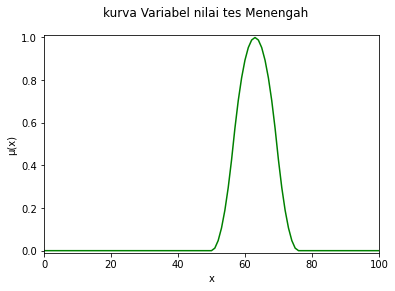

In [207]:
domainnilaiMenengah()

In [208]:
def domainnilaiTinggi():
  global x_nilai
  global a_nilaiTinggi
  global c_nilaiTinggi
  global b_nilaiTinggi
  global sbX_nilaiTinggi
  global sbY_nilaiTinggi

  print("Nilai test tulis dari siswa yang sudah di inputkan : {nilaiTes}".format(nilaiTes = x_nilai))
  
  print("Domain variabel fuzzy nilai test tulis di himpunan nilai test TINGGI (batas bawah) : ")
  a_nilaiTinggi = float(input())
  print("Domain variabel fuzzy nilai test tulis di himpunan nilai test TINGGI (batas atas) :")
  c_nilaiTinggi = float(input()) 
  b_nilaiTinggi = (a_nilaiTinggi + c_nilaiTinggi) / 2

  sbX_nilaiTinggi = []
  sbY_nilaiTinggi = []

  for i in np.arange(a_nilaiTinggi, c_nilaiTinggi + 1, 0.1):

    sbX_nilaiTinggi.append(i)
    if  i < (b_nilaiTinggi) and i > a_nilaiTinggi:
      oordinat = 2* pow(((i- a_nilaiTinggi)/(c_nilaiTinggi - a_nilaiTinggi) ),2)
      sbY_nilaiTinggi.append(oordinat)

    elif i > (b_nilaiTinggi) and i < c_nilaiTinggi: 
      oordinat = 1 - 2* pow(((c_nilaiTinggi - i) / (c_nilaiTinggi - a_nilaiTinggi)),2)
      sbY_nilaiTinggi.append(oordinat)

    elif i == (b_nilaiTinggi):
      oordinat = 0.5
      sbY_nilaiTinggi.append(oordinat)

    elif i <= a_nilaiTinggi:
      oordinat = 0
      sbY_nilaiTinggi.append(oordinat)

    elif i >= c_nilaiTinggi:
      oordinat = 1
      sbY_nilaiTinggi.append(oordinat)
    i += 1

  sbX_nilaiTinggi.insert(0, 0)
  sbX_nilaiTinggi.append(100)

  sbY_nilaiTinggi.insert(0, 0)
  sbY_nilaiTinggi.append(1)
  
  plt.plot(sbX_nilaiTinggi,sbY_nilaiTinggi, color = 'red') 
  plt.axis([0, 100, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('kurva Variabel nilai tes TINGGI')
  plt.show


Nilai test tulis dari siswa yang sudah di inputkan : 55.0
Domain variabel fuzzy nilai test tulis di himpunan nilai test TINGGI (batas bawah) : 
70.0
Domain variabel fuzzy nilai test tulis di himpunan nilai test TINGGI (batas atas) :
86.0


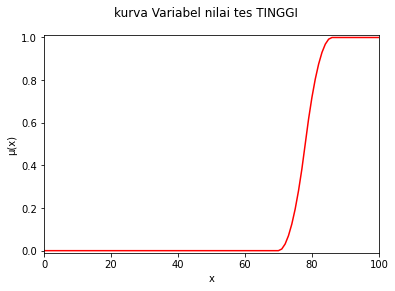

In [209]:
domainnilaiTinggi()

Langkah selanjutnya menentukan derajat keanggotaan untuk variabel nilai tes atau nilai tes tulis yang didapat siswa calon penerima beasiswa. 

In [210]:
def μNilaiRENDAH():
  global μNilaiRENDAH 

  if x_nilai >= (c_nilaiRendah):
    μNilaiRENDAH = 0

  elif  x_nilai < (b_nilaiRendah) and x_nilai > (a_nilaiRendah):
    μNilaiRENDAH = 1 - 2* pow(((x_nilai - a_nilaiRendah) / (c_nilaiRendah - a_nilaiRendah)),2)
    
  elif x_nilai > (b_nilaiRendah) and x_nilai < (c_nilaiRendah): 
    μNilaiRENDAH = 2* pow(((c_nilaiRendah-x_nilai)/(c_nilaiRendah-a_nilaiRendah) ),2)
    
  elif x_nilai == (b_nilaiRendah):
    μNilaiRENDAH = 0.5

  elif x_nilai <= (a_nilaiRendah):
    μNilaiRENDAH = 1

  print("Untuk nilai tes tulis sebesar {nilaiTes} nilai μNilaiRENDAH adalah : {derajatNilaiRendah}" 
        .format(nilaiTes = x_nilai, derajatNilaiRendah = μNilaiRENDAH))


  plt.plot(sbX_nilaiRendah,sbY_nilaiRendah, color = 'blue') 
  plt.plot(sbX_nilaiMenengah,sbY_nilaiMenengah, color = 'green') 
  plt.plot(sbX_nilaiTinggi,sbY_nilaiTinggi, color = 'red') 
  plt.plot([0,x_nilai,x_nilai],[μNilaiRENDAH,μNilaiRENDAH,0], 'k--') 
  
  plt.plot([x_nilai], [μNilaiRENDAH], 'ko')
  plt.axis([0, 100, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('derajat keanggotaan variabel Nilai tes Himpunan RENDAH')
  
  plt.show

Untuk nilai tes tulis sebesar 55.0 nilai μNilaiRENDAH adalah : 0.125


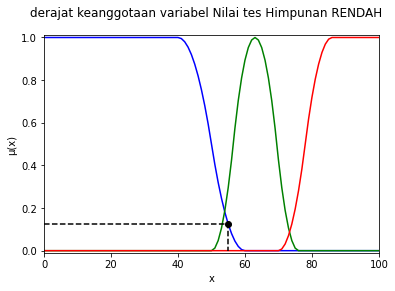

In [211]:
μNilaiRENDAH()

In [212]:
def μNilaiMENENGAH():
  global μNilaiMENENGAH

  if  x_nilai <= (a_nilaiMenengah):
    μNilaiMENENGAH = 0

  elif x_nilai < (d_nilaiMenengah) and x_nilai > a_nilaiMenengah:
    μNilaiMENENGAH = oordinat = 2* pow(((x_nilai- a_nilaiMenengah)/(c_nilaiMenengah - a_nilaiMenengah) ),2)

  elif x_nilai == d_nilaiMenengah:
    μNilaiMENENGAH = 0.5

  elif x_nilai < c_nilaiMenengah and x_nilai > d_nilaiMenengah:
    μNilaiMENENGAH = 1 - 2* pow(((c_nilaiMenengah - x_nilai) / (c_nilaiMenengah - a_nilaiMenengah)),2)

  elif x_nilai == c_nilaiMenengah:
    μNilaiMENENGAH = 1

  elif x_nilai > c_nilaiMenengah and x_nilai < e_nilaiMenengah:
    μNilaiMENENGAH = 1 - 2* pow(((x_nilai - c_nilaiMenengah) / (b_nilaiMenengah - c_nilaiMenengah)),2)

  elif x_nilai == e_nilaiMenengah:
    μNilaiMENENGAH = 0.5
    
  elif x_nilai > e_nilaiMenengah and x_nilai < b_nilaiMenengah:
    μNilaiMENENGAH = 2* pow(((b_nilaiMenengah - x_nilai)/(b_nilaiMenengah - c_nilaiMenengah) ),2)
    
  elif x_nilai >= b_nilaiMenengah:
    μNilaiMENENGAH =0
  
  print("Untuk nilai tes tulis sebesar {nilaiTes} nilai μNilaiMENENGAH adalah : {derajatNilaiMenengah}" 
        .format(nilaiTes = x_nilai, derajatNilaiMenengah = μNilaiMENENGAH))
   
  print("Untuk nilai tes tulis sebesar {nilaiTes} nilai μNilaiRENDAH adalah : {derajatNilaiRendah}" 
        .format(nilaiTes = x_nilai, derajatNilaiRendah = μNilaiRENDAH))


  plt.plot(sbX_nilaiRendah,sbY_nilaiRendah, color = 'blue') 
  plt.plot(sbX_nilaiMenengah,sbY_nilaiMenengah, color = 'green') 
  plt.plot(sbX_nilaiTinggi,sbY_nilaiTinggi, color = 'red') 
  plt.plot([0,x_nilai,x_nilai],[μNilaiRENDAH,μNilaiRENDAH,0], 'k--') 
  plt.plot([0,x_nilai,x_nilai],[μNilaiMENENGAH,μNilaiMENENGAH,0], 'k--') 
  
  plt.plot([x_nilai], [μNilaiRENDAH], 'ko')
  plt.plot([x_nilai], [μNilaiMENENGAH], 'ko')

  plt.axis([0, 100, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('derajat keanggotaan variabel Nilai tes Himpunan RENDAH')
  

  plt.show

Untuk nilai tes tulis sebesar 55.0 nilai μNilaiMENENGAH adalah : 0.2958579881656805
Untuk nilai tes tulis sebesar 55.0 nilai μNilaiRENDAH adalah : 0.125


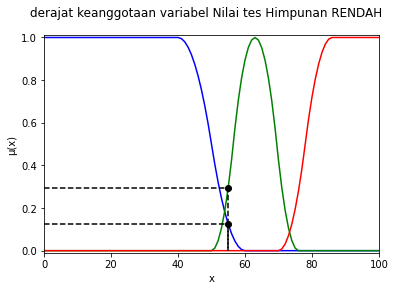

In [213]:
μNilaiMENENGAH()

In [214]:
def μNilaiTINGGI():
  if x_nilai <= (a_nilaiTinggi):
    μNilaiTINGGI = 0

  elif  x_nilai < (b_nilaiTinggi) and x_nilai > (a_nilaiTinggi):
    μNilaiTINGGI = 2* pow(((x_nilai- a_nilaiTinggi)/(c_nilaiTinggi - a_nilaiTinggi) ),2)
    

  elif x_nilai > (b_nilaiTinggi) and x_nilai < (c_nilaiTinggi): 
    μNilaiTINGGI = 1 - 2* pow(((c_nilaiTinggi - x_nilai) / (c_nilaiTinggi - a_nilaiTinggi)),2)
    

  elif x_nilai == (b_nilaiTinggi):
    μNilaiTINGGI = 0.5

  elif x_nilai >= (c_nilaiTinggi):
    μNilaiTINGGI = 1
    
  print("Untuk nilai tes tulis sebesar {nilaiTest} nilai μNilaiTINGGI adalah : {derajatNilaiTINGGI}" 
        .format(nilaiTest = x_nilai, derajatNilaiTINGGI = μNilaiTINGGI))
  
  print("Untuk nilai tes tulis sebesar {nilaiTes} nilai μNilaiRENDAH adalah : {derajatNilaiRendah}" 
        .format(nilaiTes = x_nilai, derajatNilaiRendah = μNilaiRENDAH))
  
  print("Untuk nilai tes tulis sebesar {nilaiTes} nilai μNilaiMENENGAH adalah : {derajatNilaiMenengah}" 
        .format(nilaiTes = x_nilai, derajatNilaiMenengah = μNilaiMENENGAH))


  plt.plot(sbX_nilaiRendah,sbY_nilaiRendah, color = 'blue') 
  plt.plot(sbX_nilaiMenengah,sbY_nilaiMenengah, color = 'green') 
  plt.plot(sbX_nilaiTinggi,sbY_nilaiTinggi, color = 'red') 
  
  plt.plot([0,x_nilai,x_nilai],[μNilaiRENDAH,μNilaiRENDAH,0], 'k--') 
  plt.plot([0,x_nilai,x_nilai],[μNilaiMENENGAH,μNilaiMENENGAH,0], 'k--')   
  plt.plot([0,x_nilai,x_nilai],[μNilaiTINGGI,μNilaiTINGGI,0], 'k--') 

  plt.plot([x_nilai], [μNilaiRENDAH], 'ko')
  plt.plot([x_nilai], [μNilaiMENENGAH], 'ko')
  plt.plot([x_nilai], [μNilaiTINGGI], 'ko')
  plt.axis([0, 100, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('derajat keanggotaan variabel Nilai tes himpunan TINGGI')
  

  plt.show

Untuk nilai tes tulis sebesar 55.0 nilai μNilaiTINGGI adalah : 0
Untuk nilai tes tulis sebesar 55.0 nilai μNilaiRENDAH adalah : 0.125
Untuk nilai tes tulis sebesar 55.0 nilai μNilaiMENENGAH adalah : 0.2958579881656805


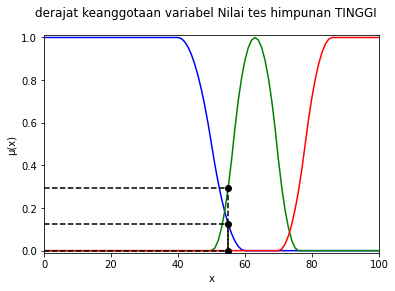

In [215]:
μNilaiTINGGI()

KURVA UNTUK VARIABEL PENGGUNAAN LISTRIK

In [216]:
def penggunaanListrik():
  global x_listrik
  print("Masukkan besar kWh penggunaan listrik rumah siswa : ")
  x_listrik = float(input())

In [220]:
penggunaanListrik()

Masukkan besar kWh penggunaan listrik rumah siswa : 
109


In [302]:
def domainlistrikIRIT():
  global x_listrik
  global a_listrikIrit
  global c_listrikIrit
  global b_listrikIrit
  global sbX_listrikIrit
  global sbY_listrikIrit

  print("Domain variabel fuzzy penggunaan listrik di himpunan listrik IRIT (batas bawah) : ")
  a_listrikIrit = float(input())
  print("Domain variabel fuzzy penggunaan listrik di himpunan listrik IRIT (batas bawah) : ")
  c_listrikIrit = float(input()) 
  b_listrikIrit = (a_listrikIrit + c_listrikIrit) / 2

  sbX_listrikIrit = []
  sbY_listrikIrit = []

  for i in np.arange(a_listrikIrit,c_listrikIrit + 1, 0.1):

    sbX_listrikIrit.append(i)
    if  i < (b_listrikIrit) and i > a_listrikIrit:
      oordinat = 1 - 2* pow(((i - a_listrikIrit) / (c_listrikIrit - a_listrikIrit)),2)
      sbY_listrikIrit.append(oordinat)

    elif i > (b_listrikIrit) and i < c_listrikIrit: 
      oordinat = 2* pow(((c_listrikIrit-i)/(c_listrikIrit-a_listrikIrit) ),2)
      sbY_listrikIrit.append(oordinat)

    elif i == (b_listrikIrit):
      oordinat = 0.5
      sbY_listrikIrit.append(oordinat)

    elif i >= c_listrikIrit:
      oordinat = 0
      sbY_listrikIrit.append(oordinat)

    elif i <= a_listrikIrit:
      oordinat = 1
      sbY_listrikIrit.append(oordinat)
      
    i += 1


  sbX_listrikIrit.insert(0, 0)
  sbX_listrikIrit.append(c_listrikIrit + 200)

  sbY_listrikIrit.insert(0, 1)
  sbY_listrikIrit.append(0)

  plt.plot(sbX_listrikIrit,sbY_listrikIrit, color = 'blue') 
  plt.axis([0, c_listrikIrit + 10, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('kurva Variabel listrik penggunaan IRIT')
  plt.show


In [ ]:
domainlistrikIRIT()

In [225]:
def domainlistrikBOROS():
  global x_listrik
  global a_listrikBoros
  global c_listrikBoros
  global b_listrikBoros
  global sbX_listrikBoros
  global sbY_listrikBoros

  print("jumlah kWh penggunaan listrik siswa yang sudah di inputkan : {listrik}".format(listrik = x_listrik))
  
  print("Domain variabel fuzzy penggunaan listrik di himpunan listrik BOROS (batas bawah) : ")
  a_listrikBoros = float(input())
  print("Domain variabel fuzzy penggunaan listrik di himpunan listrik BOROS (batas atas) : ")
  c_listrikBoros = float(input()) 
  b_listrikBoros = (a_listrikBoros + c_listrikBoros) / 2

  sbX_listrikBoros = []
  sbY_listrikBoros = []

  for i in np.arange(a_listrikBoros,c_listrikBoros + 0.1):

    sbX_listrikBoros.append(i)
    if  i < (b_listrikBoros) and i > a_listrikBoros:
      oordinat = 2* pow(((i- a_listrikBoros)/(c_listrikBoros - a_listrikBoros) ),2)
      sbY_listrikBoros.append(oordinat)

    elif i > (b_listrikBoros) and i < c_listrikBoros: 
      oordinat = 1 - 2* pow(((c_listrikBoros - i) / (c_listrikBoros- a_listrikBoros)),2)
      sbY_listrikBoros.append(oordinat)

    elif i == (b_listrikBoros):
      oordinat = 0.5
      sbY_listrikBoros.append(oordinat)

    elif i <= a_listrikBoros:
      oordinat = 0
      sbY_listrikBoros.append(oordinat)

    elif i >= c_listrikBoros:
      oordinat = 1
      sbY_listrikBoros.append(oordinat)
    i += 1

  
  sbX_listrikBoros.insert(0, 0)
  sbX_listrikBoros.append(c_listrikBoros + 30)

  sbY_listrikBoros.insert(0, 0)
  sbY_listrikBoros.append(1)
  

  plt.plot(sbX_listrikBoros,sbY_listrikBoros, color = 'red') 
  plt.axis([0, c_listrikBoros + 30, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('kurva Variabel listrik penggunaan BOROS')
  plt.show


jumlah kWh penggunaan listrik siswa yang sudah di inputkan : 109.0
Domain variabel fuzzy penggunaan listrik di himpunan listrik BOROS (batas bawah) : 
108
Domain variabel fuzzy penggunaan listrik di himpunan listrik BOROS (batas atas) : 
180


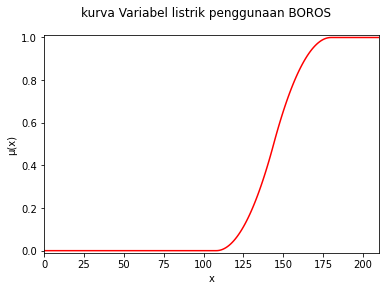

In [226]:
domainlistrikBOROS()

Langkah selanjutnya menentukan derajat keanggotaan untuk variabel data rekening listrik sebulan terakhir calon penerima beasiswa. 

In [234]:
def μListrikIRIT():
  global μlistrikIrit

  if x_penghasilan < (b_listrikIrit) and x_penghasilan > a_listrikIrit:
    μlistrikIrit = 1 - 2* pow(((x_penghasilan - a_listrikIrit) / (c_listrikIrit - a_listrikIrit)),2)     

  elif x_penghasilan > (b_listrikIrit) and x_penghasilan < c_listrikIrit: 
    μlistrikIrit = 2* pow(((c_listrikIrit-x_penghasilan)/(c_listrikIrit-a_listrikIrit) ),2)
    
  elif x_penghasilan == (b_listrikIrit):
    μlistrikIrit = 0.5 

  elif x_penghasilan >= c_listrikIrit:
    μlistrikIrit = 0

  elif x_penghasilan <= a_listrikIrit:
    μlistrikIrit = 1
  
    
  print("Untuk penggunaan listrik sebesar {kWh} kWh nilai μlistrikIrit adalah : {derajatListrikIrit}" 
        .format(kWh = x_penghasilan, derajatListrikIrit = μlistrikIrit))


  plt.plot(sbX_listrikIrit,sbY_listrikIrit, color = 'blue') 
  plt.plot(sbX_listrikBoros,sbY_listrikBoros, color = 'red') 
  plt.plot([0,x_penghasilan,x_penghasilan],[μlistrikIrit,μlistrikIrit,0], 'g--') 
  
  plt.plot([x_penghasilan], [μlistrikIrit], 'go')
  plt.axis([0, c_listrikBoros + 30, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('derajat keanggotaan variabel penggunaan listrik Himpunan IRIT')
  

  plt.show

Untuk penggunaan listrik sebesar 109.0 kWh nilai μlistrikIrit adalah : 0.16574839302112032


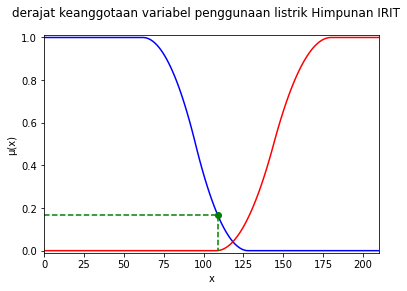

In [235]:
μListrikIRIT()

In [240]:
def μListrikBOROS():

  global μlistrikBoros

  if  x_listrik < (b_listrikBoros) and x_listrik > a_listrikBoros:
    μlistrikBoros = 2* pow(((x_listrik- a_listrikBoros)/(c_listrikBoros - a_listrikBoros) ),2)

  elif x_listrik > (b_listrikBoros) and x_listrik < c_listrikBoros: 
    μlistrikBoros = 1 - 2* pow(((c_listrikBoros - x_listrik) / (c_listrikBoros- a_listrikBoros)),2)

  elif x_listrik == (b_listrikBoros):
    μlistrikBoros = 0.5

  elif x_listrik <= a_listrikBoros:
    μlistrikBoros = 0

  elif x_listrik >= c_listrikBoros:
    μlistrikBoros = 1
     

  print("Untuk penggunaan listrik sebesar {kWh} nilai μlistrikIrit adalah : {derajatListrikIrit}" 
        .format(kWh = x_listrik, derajatListrikIrit = μlistrikIrit))
  
  print("Untuk penggunaan listrik sebesar {kWh} nilai μListrikBOROS adalah : {derajatListrikBOROS}" 
        .format(kWh = x_listrik, derajatListrikBOROS = μlistrikBoros))


  plt.plot(sbX_listrikIrit,sbY_listrikIrit, color = 'blue') 
  plt.plot(sbX_listrikBoros,sbY_listrikBoros, color = 'red') 
  plt.plot([0,x_listrik,x_listrik],[μlistrikIrit,μlistrikIrit,0], 'g--')
  plt.plot([0,x_listrik,x_listrik],[μlistrikBoros,μlistrikBoros,0], 'g--') 
  plt.plot([x_listrik], [μlistrikIrit], 'go')
  plt.plot([x_listrik], [μlistrikBoros], 'go')
  plt.axis([0, c_listrikBoros + 30, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('derajat keanggotaan variabel penggunaan listrik Himpunan BOROS')
  

  plt.show

Untuk penggunaan listrik sebesar 109.0 nilai μlistrikIrit adalah : 0.16574839302112032
Untuk penggunaan listrik sebesar 109.0 nilai μListrikBOROS adalah : 0.00038580246913580245


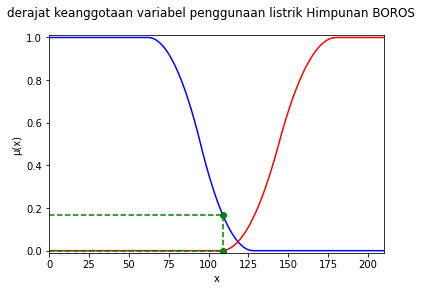

In [241]:
μListrikBOROS()

KURVA UNTUK VARIABEL PENDAPATAN ORANG TUA

In [337]:
def besarPenghasilan():
  global x_penghasilan
  print("Masukkan besar penghasilan orang tua siswa : \n(Contoh 4.6 untuk penghasilan 4.6 juta)")
  x_penghasilan = float(input())

In [345]:
besarPenghasilan()

Masukkan besar penghasilan orang tua siswa : 
(Contoh 4.6 untuk penghasilan 4.6 juta)
9.8


In [339]:
def domainpenghasilanKecil():
  global x_penghasilan
  global a_penghasilanKecil
  global b_penghasilanKecil
  global sbX_penghasilanKecil
  global sbY_penghasilanKecil

  print("Besar pendapatan orang tua siswa yang sudah di inputkan : {juta}".format(juta = x_penghasilan))

  print("Domain variabel fuzzy penghasilan orang tua di himpunan penghasilan KECIL (batas bawah) : ")
  a_penghasilanKecil = float(input())
  print("Domain variabel fuzzy penghasilan orang tua di himpunan penghasilan KECIL (batas atas) : ")
  b_penghasilanKecil = float(input()) 
  

  sbX_penghasilanKecil = []
  sbY_penghasilanKecil = []

  for i in np.arange(a_penghasilanKecil, b_penghasilanKecil + 1, 0.01):

    sbX_penghasilanKecil.append(i)
    if  i <= (b_penghasilanKecil) and i >= a_penghasilanKecil:
      oordinat = ((b_penghasilanKecil - i) / (b_penghasilanKecil - a_penghasilanKecil))
      sbY_penghasilanKecil.append(oordinat)

    elif i >= b_penghasilanKecil:
      oordinat = 0
      sbY_penghasilanKecil.append(oordinat)

    elif i <= a_penghasilanKecil:
      oordinat = 1
      sbY_penghasilanKecil.append(oordinat)

    i += 1


  sbX_penghasilanKecil.insert(0, 0)
  sbX_penghasilanKecil.append(b_penghasilanKecil + 100 )

  sbY_penghasilanKecil.insert(0, 1)
  sbY_penghasilanKecil.append(0)

  plt.plot(sbX_penghasilanKecil,sbY_penghasilanKecil, color = 'blue') 
  plt.axis([0, b_penghasilanKecil + 1, -0.01 ,1.01])
  plt.xlabel('x  (x dalam juta)')
  plt.ylabel('μ(x)')
  plt.suptitle('kurva Variabel penghasilan himpinan penghasilan KECIL')
  plt.show


Besar pendapatan orang tua siswa yang sudah di inputkan : 9.8
Domain variabel fuzzy penghasilan orang tua di himpunan penghasilan KECIL (batas bawah) : 
2.4
Domain variabel fuzzy penghasilan orang tua di himpunan penghasilan KECIL (batas atas) : 
7


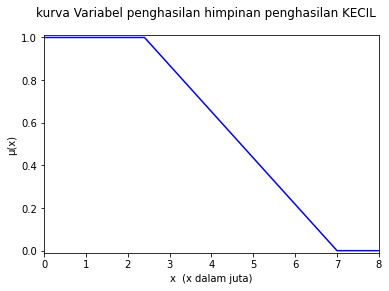

In [346]:
domainpenghasilanKecil()

In [327]:
def domainpenghasilanBesar():
  global x_penghasilan
  global a_penghasilanBesar
  global b_penghasilanBesar
  global sbX_penghasilanBesar
  global sbY_penghasilanBesar

  print("Besar pendapatan orang tua siswa yang sudah di inputkan : {juta}".format(juta = x_penghasilan))

  print("Domain variabel fuzzy penghasilan orang tua di himpunan penghasilan BESAR (batas bawah) : ")
  a_penghasilanBesar = float(input())
  print("Domain variabel fuzzy penghasilan orang tua di himpunan penghasilan BESAR (batas atas) : ")
  b_penghasilanBesar = float(input()) 
  

  sbX_penghasilanBesar = []
  sbY_penghasilanBesar= []

  for i in np.arange(a_penghasilanBesar, b_penghasilanBesar + 1, 0.01):

    sbX_penghasilanBesar.append(i)
    if  i <= (b_penghasilanBesar) and i >= a_penghasilanBesar:
      oordinat = (( i- a_penghasilanBesar) / (b_penghasilanBesar - a_penghasilanBesar))
      sbY_penghasilanBesar.append(oordinat)

    elif i >= b_penghasilanBesar:
      oordinat = 1
      sbY_penghasilanBesar.append(oordinat)

    elif i <= a_penghasilanBesar:
      oordinat = 0
      sbY_penghasilanBesar.append(oordinat)

    i += 1


  sbX_penghasilanBesar.insert(0, 0)
  sbX_penghasilanBesar.append(b_penghasilanBesar + 11 )

  sbY_penghasilanBesar.insert(0, 0)
  sbY_penghasilanBesar.append(1)

  plt.plot(sbX_penghasilanBesar,sbY_penghasilanBesar, color = 'red') 
  plt.axis([0, b_penghasilanBesar + 1, -0.01 ,1.01])
  plt.xlabel('x  (x dalam juta)')
  plt.ylabel('μ(x)')
  plt.suptitle('kurva Variabel penghasilan himpinan penghasilan BESAR')
  plt.show


Besar pendapatan orang tua siswa yang sudah di inputkan : 9.8
Domain variabel fuzzy penghasilan orang tua di himpunan penghasilan BESAR (batas bawah) : 
5.0
Domain variabel fuzzy penghasilan orang tua di himpunan penghasilan BESAR (batas atas) : 
10


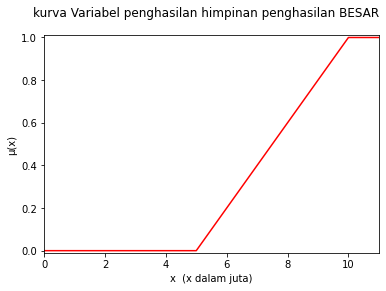

In [347]:
domainpenghasilanBesar()

Langkah selanjutnya menentukan derajat keanggotaan untuk variabel penghasilan orang tua calon penerima beasiswa. 

In [348]:
def μPenghasilanKECIL():
  global μpenghasilanKecil

  if x_penghasilan <= (b_penghasilanKecil) and x_penghasilan >= a_penghasilanKecil:
    μpenghasilanKecil =  ((b_penghasilanKecil - x_penghasilan) / (b_penghasilanKecil - a_penghasilanKecil))

  elif x_penghasilan >= b_penghasilanKecil:
    μpenghasilanKecil = 0

  elif x_penghasilan <= a_penghasilanKecil:
    μpenghasilanKecil = 1
  
    
  print("Untuk penghasilan orang tua sebesar {juta} juta rupiah nilai μpenghasilanKecil adalah : {penghasilanKecil}" 
        .format(juta = x_penghasilan, penghasilanKecil = μpenghasilanKecil))


  plt.plot(sbX_penghasilanKecil,sbY_penghasilanKecil, color = 'blue') 
  plt.plot(sbX_penghasilanBesar,sbY_penghasilanBesar, color = 'red') 
  plt.plot([0,x_penghasilan,x_penghasilan],[μpenghasilanKecil,μpenghasilanKecil,0], 'g--') 
  
  plt.plot([x_penghasilan], [μpenghasilanKecil], 'go')
  plt.axis([0, b_penghasilanBesar + 1, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('derajat keanggotaan variabel penghasilan orang tua Himpunan KECIL :')
  
  plt.show

Untuk penghasilan orang tua sebesar 9.8 juta rupiah nilai μpenghasilanKecil adalah : 0


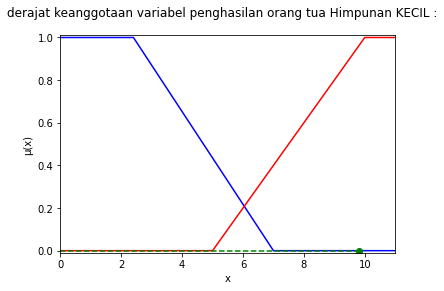

In [349]:
μPenghasilanKECIL()

In [350]:
def μPenghasilanBesar():
  global μpenghasilanBesar

  if x_penghasilan <= (b_penghasilanBesar) and x_penghasilan >= a_penghasilanBesar:
    μpenghasilanBesar = ((x_penghasilan - a_penghasilanBesar) / (b_penghasilanBesar - a_penghasilanBesar))

  elif x_penghasilan >= b_penghasilanBesar:
    μpenghasilanBesar = 0

  elif x_penghasilan <= a_penghasilanBesar:
    μpenghasilanBesar = 1
  
  print("Untuk penghasilan orang tua sebesar {juta} juta rupiah nilai μpenghasilanBesar adalah : {penghasilanBesar}" 
        .format(juta = x_penghasilan, penghasilanBesar = μpenghasilanBesar))
  
  print("Untuk penghasilan orang tua sebesar {juta} juta rupiah nilai μpenghasilanKecil adalah : {penghasilanKecil}" 
        .format(juta = x_penghasilan, penghasilanKecil = μpenghasilanKecil))


  plt.plot(sbX_penghasilanKecil,sbY_penghasilanKecil, color = 'blue') 
  plt.plot(sbX_penghasilanBesar,sbY_penghasilanBesar, color = 'red') 
  plt.plot([0,x_penghasilan,x_penghasilan],[μpenghasilanKecil,μpenghasilanKecil,0], 'g--') 
  plt.plot([0,x_penghasilan,x_penghasilan],[μpenghasilanBesar,μpenghasilanBesar,0], 'g--') 
  
  plt.plot([x_penghasilan], [μpenghasilanKecil], 'go')
  plt.plot([x_penghasilan], [μpenghasilanBesar], 'go')
  plt.axis([0, b_penghasilanBesar + 1, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('derajat keanggotaan variabel penghasilan orang tua Himpunan BESAR :')
  
  plt.show

Untuk penghasilan orang tua sebesar 9.8 juta rupiah nilai μpenghasilanBesar adalah : 0.9600000000000002
Untuk penghasilan orang tua sebesar 9.8 juta rupiah nilai μpenghasilanKecil adalah : 0


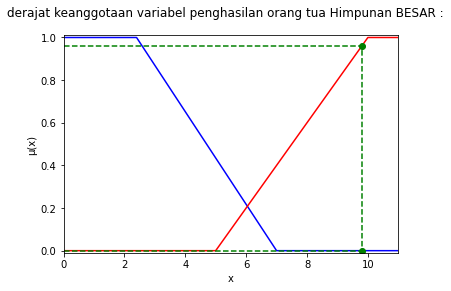

In [351]:
μPenghasilanBesar()